In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
data = pd.read_csv('stress.csv')

In [3]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Stress level,Total Score,Doctor Numbers
0,3,1,0,2,0,3,0,Mild,9,18
1,3,3,0,1,1,0,2,Moderate,10,20
2,2,0,1,3,3,1,1,Moderate,11,22
3,1,1,1,1,2,0,3,Mild,9,18
4,1,1,0,0,2,2,1,Normal,7,14


In [4]:
# Basic info about the dataset
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              1000 non-null   int64 
 1   Q2              1000 non-null   int64 
 2   Q3              1000 non-null   int64 
 3   Q4              1000 non-null   int64 
 4   Q5              1000 non-null   int64 
 5   Q6              1000 non-null   int64 
 6   Q7              1000 non-null   int64 
 7   Stress level    1000 non-null   object
 8   Total Score     1000 non-null   int64 
 9   Doctor Numbers  1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.3+ KB
None


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Q1           Q2           Q3           Q4           Q5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.534000     1.497000     1.524000     1.512000     1.526000   
std       1.118971     1.098726     1.141371     1.125666     1.123649   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     0.000000     1.000000   
50%       2.000000     1.000000     2.000000     2.000000     2.000000   
75%       3.000000     2.000000     3.000000     3.000000     3.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

                Q6           Q7  Total Score  Doctor Numbers  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean      1.467000     1.483000    10.543000       21.086000  
std       1.106406     1.129153     2.980442        5.960884  
min       0.000000     0.000000     1.000000        2.000000

In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Stress level      0
Total Score       0
Doctor Numbers    0
dtype: int64


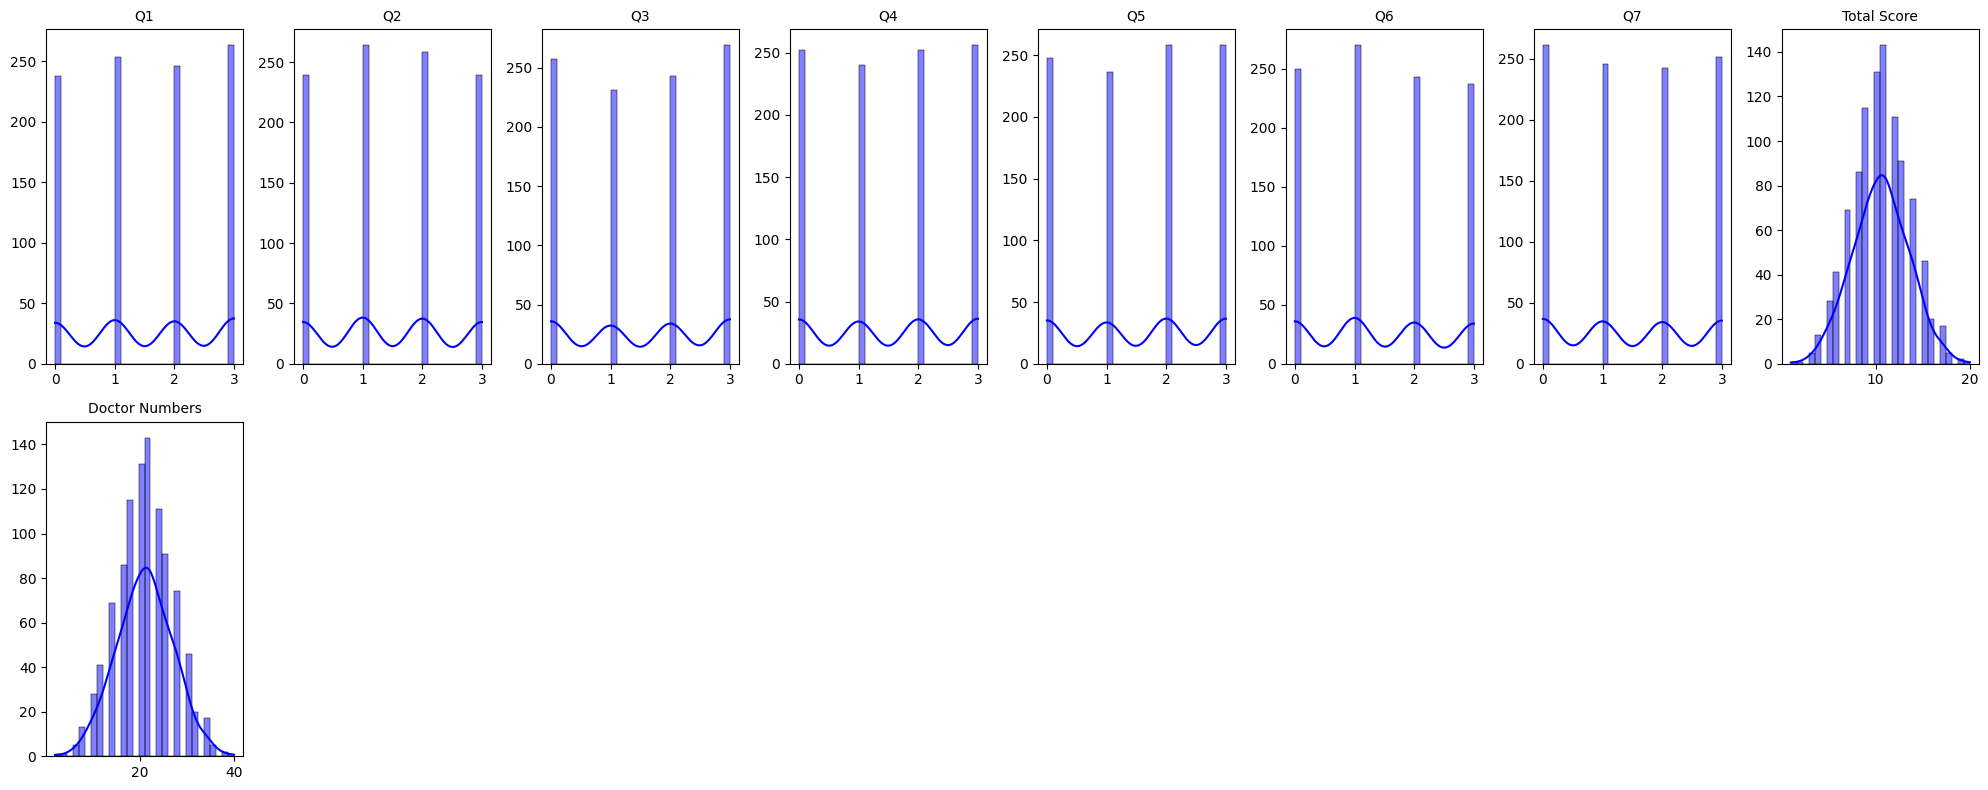

In [7]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for all numeric columns
num_cols = len(numeric_columns)  # Number of numeric columns
rows = (num_cols // 8) + (1 if num_cols % 8 != 0 else 0)  # Calculate rows for 8 columns per row

fig, axes = plt.subplots(rows, 8, figsize=(20, 4 * rows))  # Dynamic figsize for 8 columns per row
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

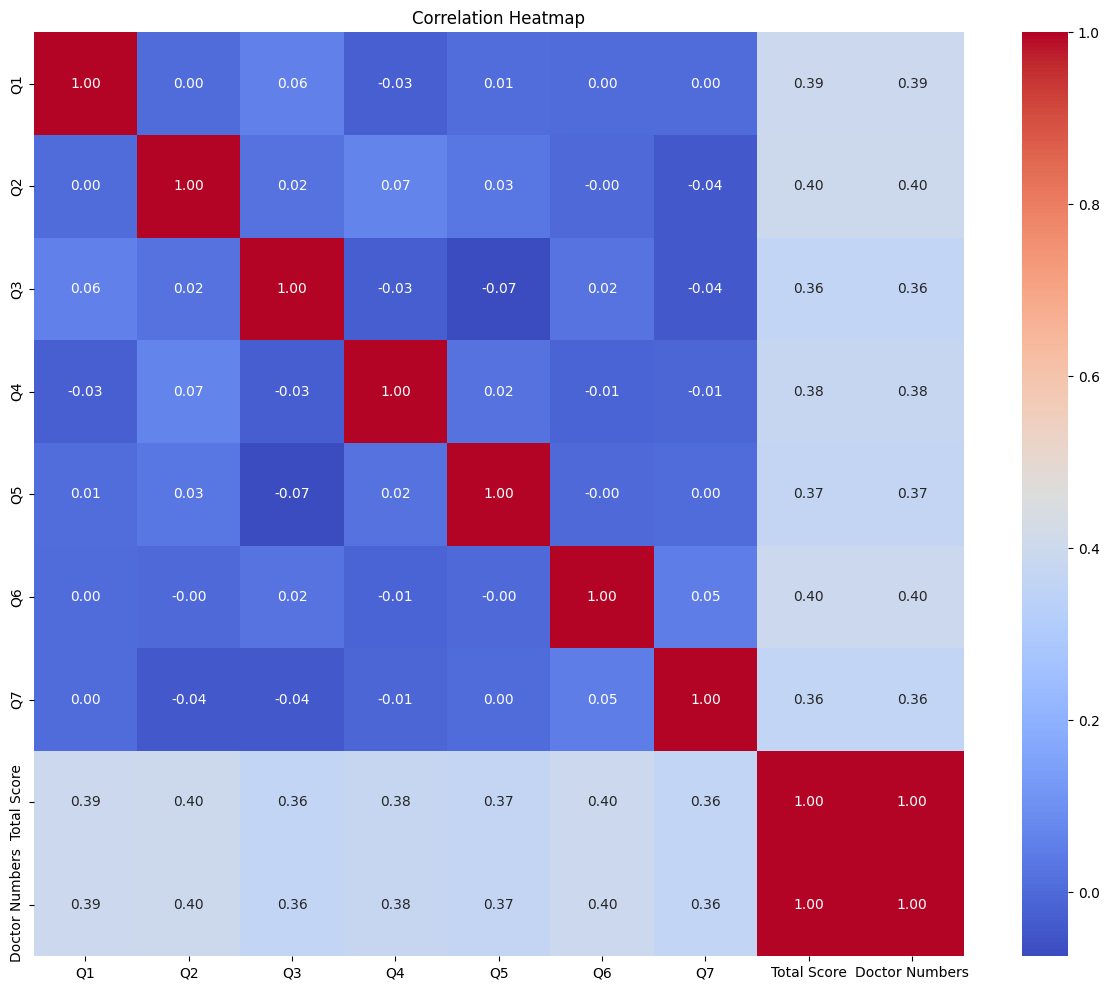

In [8]:
# Correlation heatmap (only for numeric features)
plt.figure(figsize=(15, 12))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_21264\4159128282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[target_column], palette='viridis')


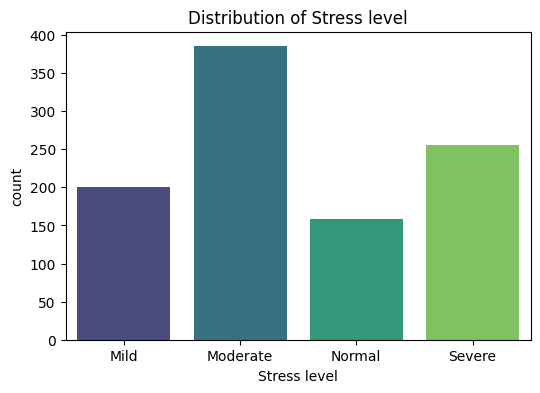

In [9]:
# Target distribution (for categorical output column)
target_column = 'Stress level'  # Change this to your column name
if target_column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[target_column], palette='viridis')
    plt.title(f'Distribution of {target_column}')
    plt.show()



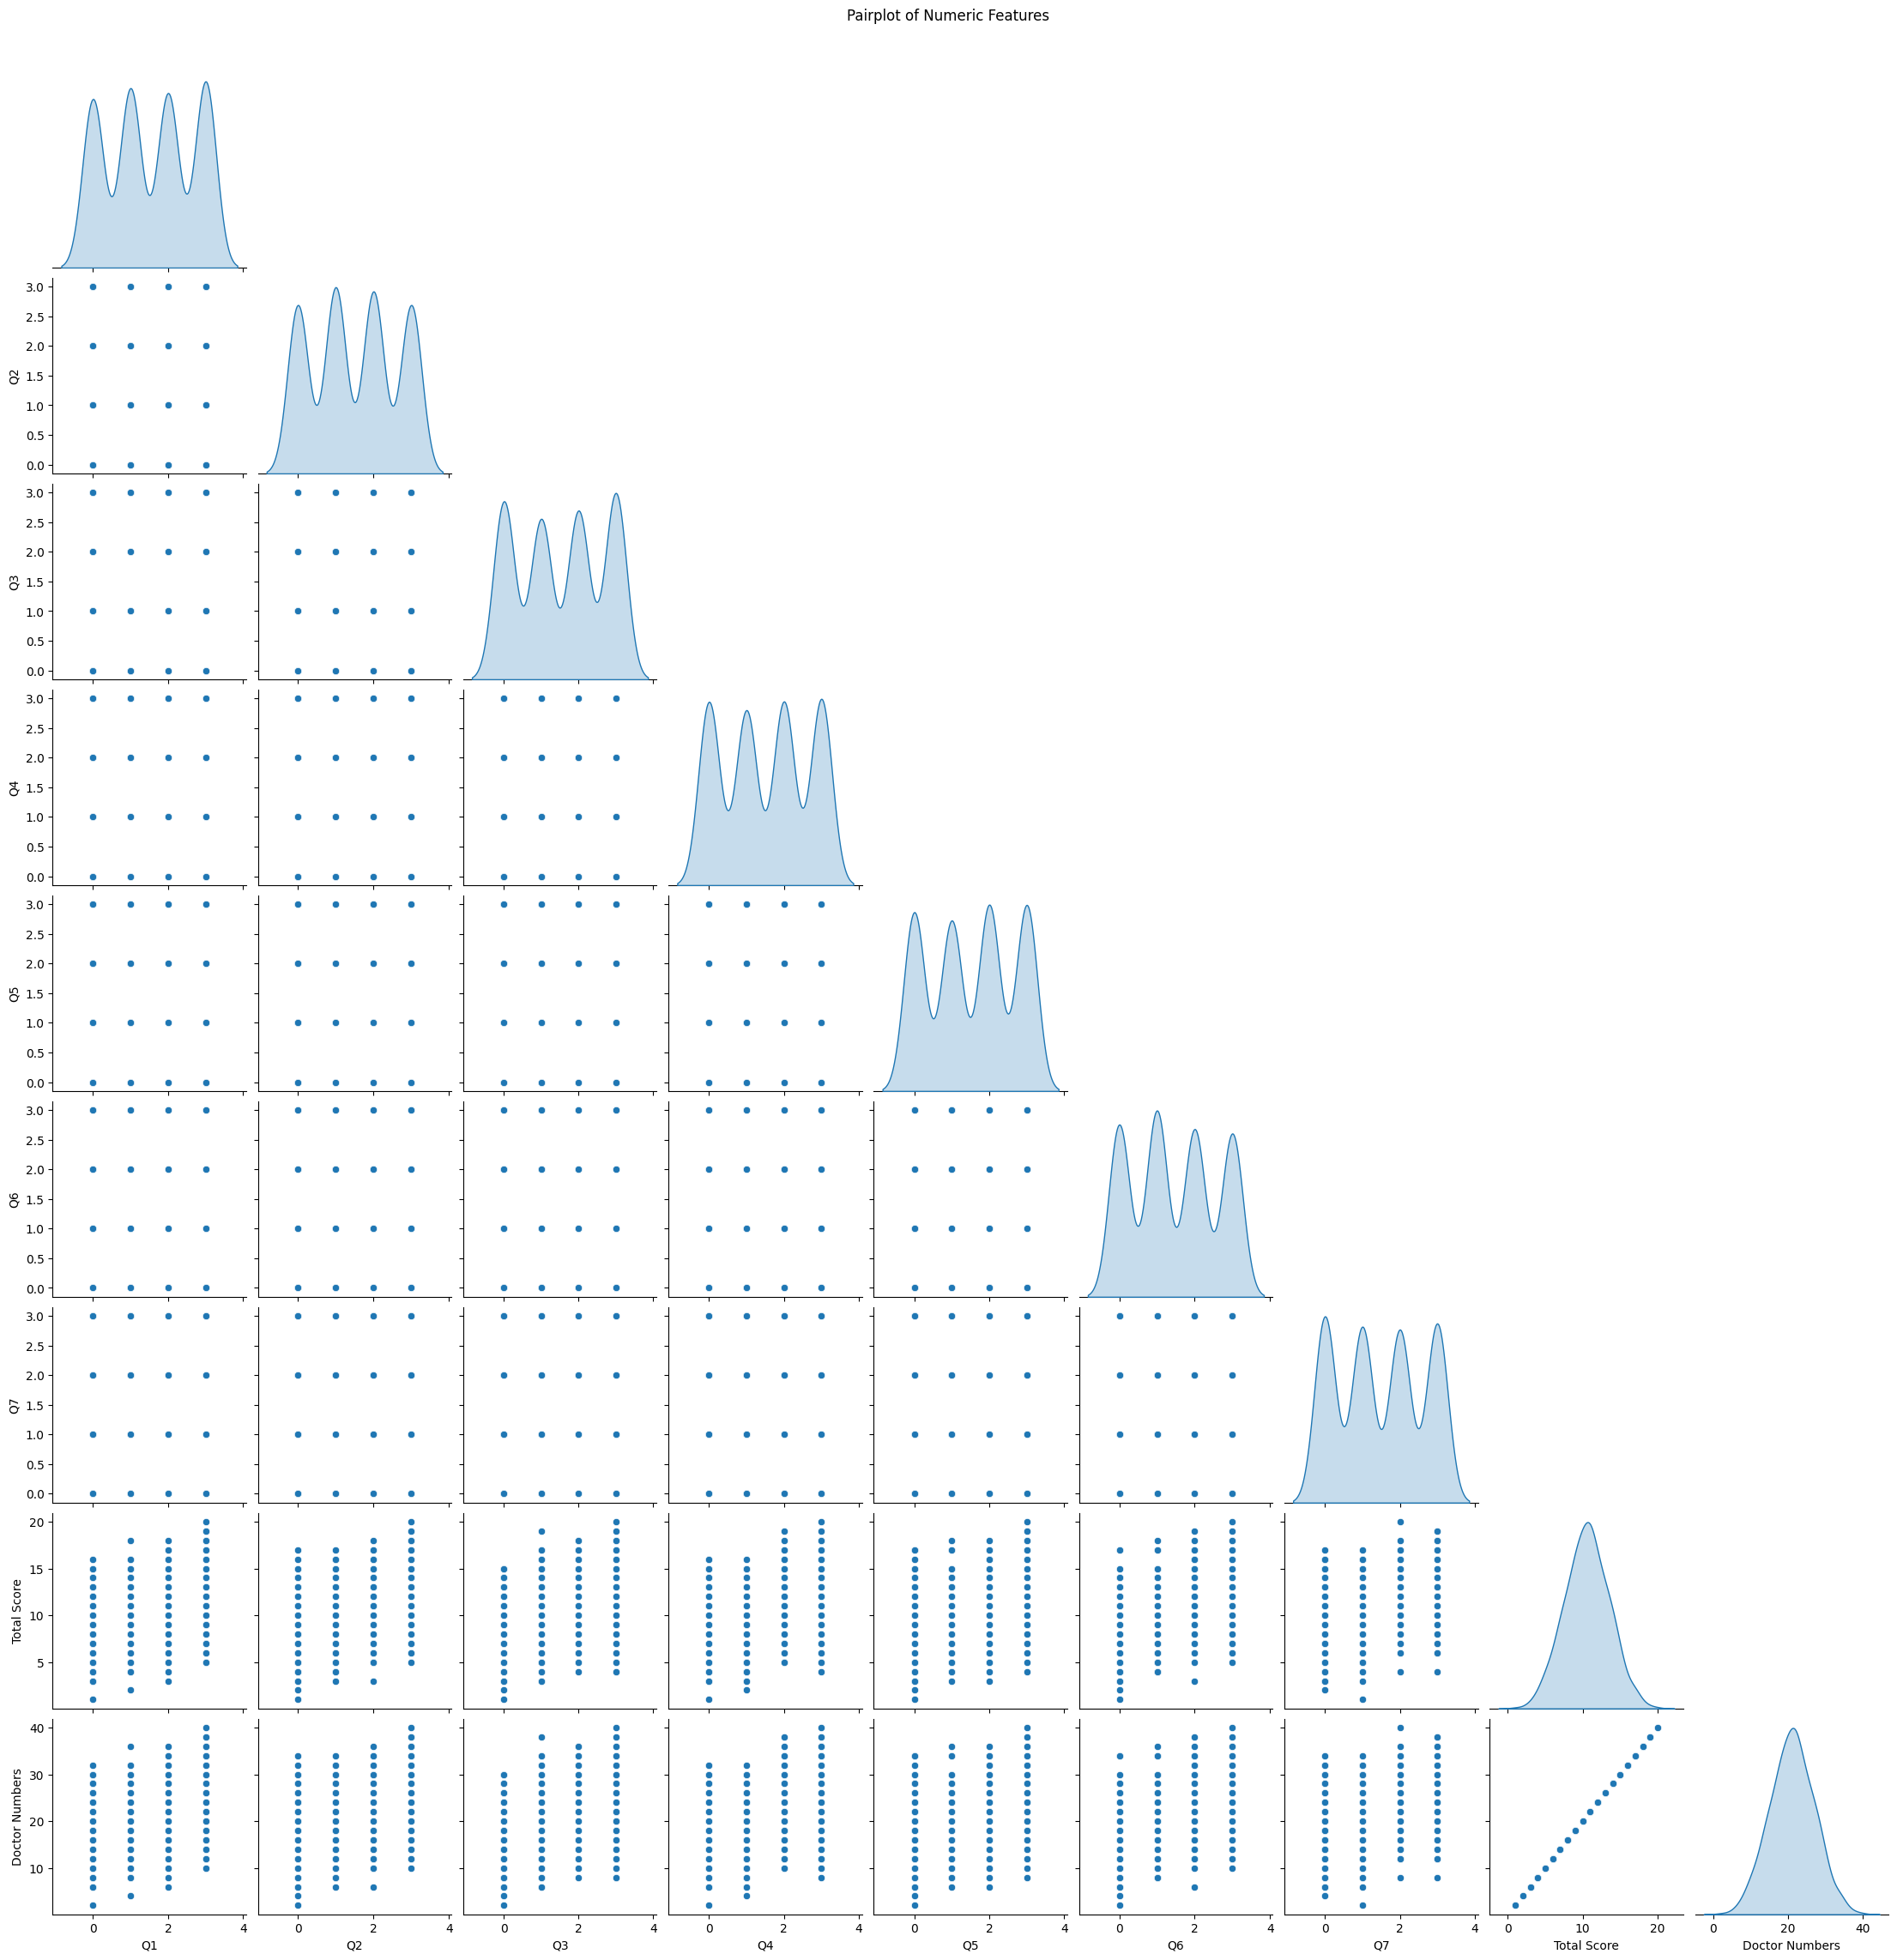

In [10]:
# Pairplot for feature relationships
sns.pairplot(data[numeric_columns], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [11]:
# Separate features and target
X = data.iloc[:, :-3]  # Assuming the first 10 columns are numeric features
y = data.iloc[:, -3]   # Assuming the last column is the categorical target

In [12]:
# Encode the categorical target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [14]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

In [15]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 1.00
Random Forest: Accuracy = 0.70
Support Vector Machine: Accuracy = 0.92


In [16]:
# Find the best algorithm
best_model_name = max(results, key=results.get)
print(f"\nBest Algorithm: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")


Best Algorithm: Logistic Regression with Accuracy = 1.00


C:\Users\MSI\AppData\Local\Temp\ipykernel_21264\802701280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


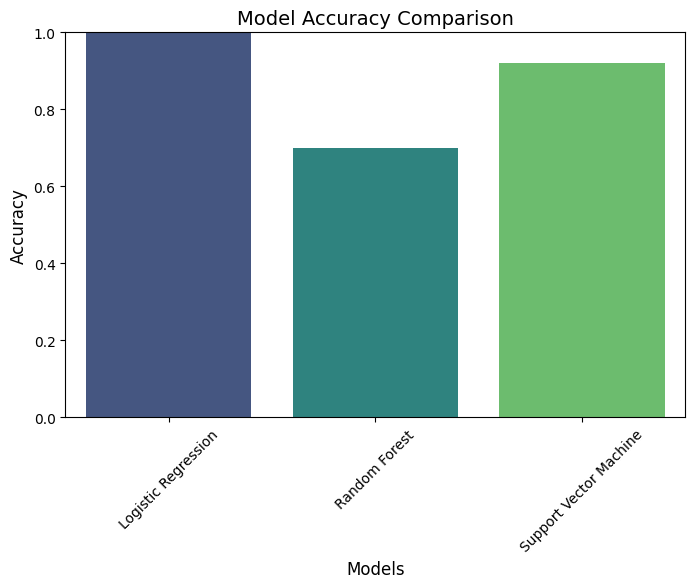

In [17]:
# Create a bar chart for accuracies
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = list(results.values())

sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [18]:
import joblib

# Find the best model object
best_model = models[best_model_name]

# Save the trained model object
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')  # Replace 'label_encoder' with your encoder object
print("Label encoder saved as 'label_encoder.pkl'")


Best model saved as 'best_model.pkl'
Label encoder saved as 'label_encoder.pkl'


In [19]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('best_model.pkl')
print("Model loaded successfully")

# Load the label encoder
loaded_encoder = joblib.load('label_encoder.pkl')
print("Label encoder loaded successfully")

# Sample input
sample_input = np.array([[2, 0, 1, 3, 3, 2, 1]])

# Ensure input is reshaped correctly (1 sample, 10 features)
if sample_input.shape[1] != 7:
    print("Error: Sample input must have 10 features.")
else:
    # Predict the encoded class
    predicted_class_encoded = loaded_model.predict(sample_input)

    # Decode the class to its original label
    predicted_class = loaded_encoder.inverse_transform(predicted_class_encoded)

    print(f"Predicted class for the sample input: {predicted_class[0]}")


Model loaded successfully
Label encoder loaded successfully
Predicted class for the sample input: Moderate


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
# Separate features and target
X_2 = data.iloc[:, :-3]  # Assuming the first 10 columns are numeric features
y_2 = data.iloc[:, -1]   # Assuming the last column is the categorical target

In [21]:
# Encode the categorical target
label_encoder_2 = LabelEncoder()
y_encoded_2 = label_encoder_2.fit_transform(y_2)

In [22]:
# Split the dataset into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_encoded_2, test_size=0.2, random_state=42)

In [23]:
# Initialize models
models_2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

In [24]:
# Train and evaluate models
results_2 = {}
for name_2, model_2 in models_2.items():
    model_2.fit(X_train_2, y_train_2)  # Train the model
    y_pred_2 = model_2.predict(X_test_2)  # Predict on the test set
    accuracy = accuracy_score(y_test_2, y_pred_2)  # Calculate accuracy
    results_2[name_2] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

Support Vector Machine: Accuracy = 0.60
Support Vector Machine: Accuracy = 0.27
Support Vector Machine: Accuracy = 0.54


In [25]:
# Find the best algorithm
best_model_name_2 = max(results_2, key=results_2.get)
print(f"\nBest Algorithm: {best_model_name_2} with Accuracy = {results_2[best_model_name_2]:.2f}")


Best Algorithm: Logistic Regression with Accuracy = 0.60


C:\Users\MSI\AppData\Local\Temp\ipykernel_21264\4173582242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


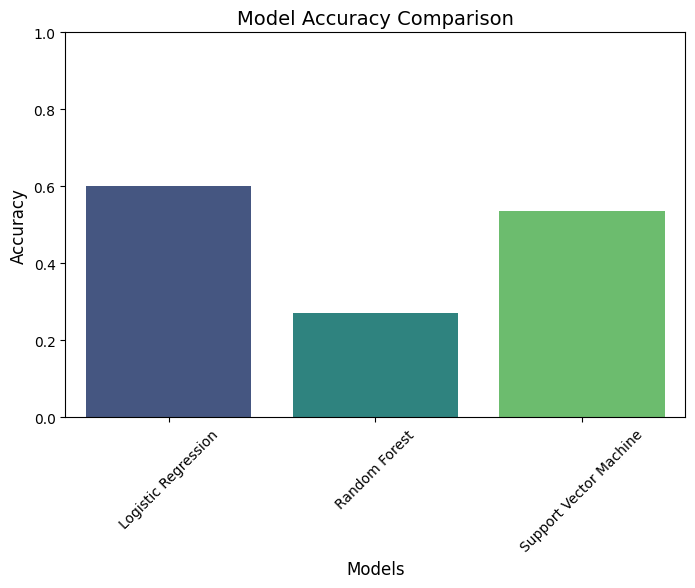

In [26]:
# Create a bar chart for accuracies
plt.figure(figsize=(8, 5))
model_names = list(results_2.keys())
accuracies = list(results_2.values())

sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [27]:
import joblib

# Find the best model object
best_model_2 = models[best_model_name_2]

# Save the trained model object
joblib.dump(best_model_2, 'best_model_2.pkl')
print("Best model saved as 'best_model_2.pkl'")

# Save the label encoder
joblib.dump(label_encoder_2, 'label_encoder_2.pkl')  # Replace 'label_encoder' with your encoder object
print("Label encoder saved as 'label_encoder_2.pkl'")

Best model saved as 'best_model_2.pkl'
Label encoder saved as 'label_encoder_2.pkl'


In [ ]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('best_model_2.pkl')
print("Model loaded successfully")

# Load the label encoder
loaded_encoder = joblib.load('label_encoder_2.pkl')
print("Label encoder loaded successfully")

# Sample input
sample_input = np.array([[2, 0, 1, 3, 3, 2, 1]])

if sample_input.shape[1] != 7:
    print("Error: Sample input must have 10 features.")
else:
    # Predict the encoded class
    predicted_class_encoded = loaded_model.predict(sample_input)

    # Decode the class to its original label
    predicted_class = loaded_encoder.inverse_transform(predicted_class_encoded)

    print(f"Predicted class for the sample input: {predicted_class[0]}")

Model loaded successfully
Label encoder loaded successfully
Predicted class for the sample input: 4


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
